In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from nnfs.datasets import spiral_data

2022-09-21 17:47:43.014877: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-21 17:47:43.529161: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-21 17:47:43.529197: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-21 17:47:43.579885: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-21 17:47:44.590207: W tensorflow/stream_executor/platform/de

In [2]:
X, y = spiral_data(1000, classes=2)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=.2,
    random_state=43
)


print(f'X_train{X_train.shape}')
print(f'X_test{X_test.shape}')
print(f'y_train{y_train.shape}')
print(f'y_test{y_test.shape}')
print(f'X{X.shape}')
print(f'y{y.shape}')

X_train(1600, 2)
X_test(400, 2)
y_train(1600,)
y_test(400,)
X(2000, 2)
y(2000,)


In [3]:
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

# membuat callbacks
lr_rate_schedular = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model.fit(
    X_train, 
    y_train, 
    epochs=100,
    callbacks=[lr_rate_schedular]
)

Epoch 1/100


2022-09-21 17:47:47.358930: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-21 17:47:47.359331: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-21 17:47:47.359350: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (anggads01): /proc/driver/nvidia/version does not exist
2022-09-21 17:47:47.360018: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


50/50 [==============================] - 0s 888us/step - loss: 0.6958 - accuracy: 0.5194 - lr: 1.0000e-04
Epoch 2/100
50/50 [==============================] - 0s 876us/step - loss: 0.6954 - accuracy: 0.5206 - lr: 1.1220e-04
Epoch 3/100
50/50 [==============================] - 0s 913us/step - loss: 0.6949 - accuracy: 0.5344 - lr: 1.2589e-04
Epoch 4/100
50/50 [==============================] - 0s 942us/step - loss: 0.6945 - accuracy: 0.5475 - lr: 1.4125e-04
Epoch 5/100
50/50 [==============================] - 0s 934us/step - loss: 0.6940 - accuracy: 0.5556 - lr: 1.5849e-04
Epoch 6/100
50/50 [==============================] - 0s 897us/step - loss: 0.6934 - accuracy: 0.5569 - lr: 1.7783e-04
Epoch 7/100
50/50 [==============================] - 0s 855us/step - loss: 0.6928 - accuracy: 0.5650 - lr: 1.9953e-04
Epoch 8/100
50/50 [==============================] - 0s 924us/step - loss: 0.6922 - accuracy: 0.5688 - lr: 2.2387e-04
Epoch 9/100
50/50 [==============================] - 0s 996us/step -

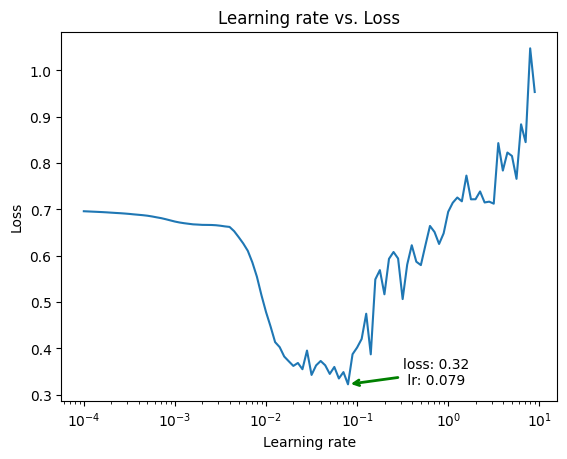

In [4]:
# Tuning lr ideally

lrs =  1e-4 * (10**(tf.range(100) / 20))
loss = np.array(history.history['loss'])

history_lr = pd.DataFrame(np.c_[lrs, np.array(history.history['loss'])])
x_lr, y_loss = history_lr.iloc[np.argmin(loss), :] 

plt.semilogx(lrs, loss)
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. Loss')

plt.annotate(
    f"loss: {round(y_loss, 2)}\n lr: {round(x_lr, 3)}", 
    xy=(x_lr, y_loss), 
    xytext=(y_loss, y_loss), 
    arrowprops=dict(arrowstyle="->", 
    color="green", 
    lw=2,
   )
)

plt.show()


In [5]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.022),
    metrics=['accuracy']
)


history = model.fit(
    X_train, 
    y_train, 
    epochs=100,
)

Epoch 1/100
50/50 [==============================] - 0s 972us/step - loss: 0.6670 - accuracy: 0.5644
Epoch 2/100
50/50 [==============================] - 0s 861us/step - loss: 0.6185 - accuracy: 0.5906
Epoch 3/100
50/50 [==============================] - 0s 1ms/step - loss: 0.5503 - accuracy: 0.7262
Epoch 4/100
50/50 [==============================] - 0s 931us/step - loss: 0.4106 - accuracy: 0.8450
Epoch 5/100
50/50 [==============================] - 0s 1ms/step - loss: 0.3513 - accuracy: 0.8744
Epoch 6/100
50/50 [==============================] - 0s 1ms/step - loss: 0.3162 - accuracy: 0.8850
Epoch 7/100
50/50 [==============================] - 0s 997us/step - loss: 0.3044 - accuracy: 0.9013
Epoch 8/100
50/50 [==============================] - 0s 969us/step - loss: 0.1904 - accuracy: 0.9381
Epoch 9/100
50/50 [==============================] - 0s 962us/step - loss: 0.1866 - accuracy: 0.9431
Epoch 10/100
50/50 [==============================] - 0s 963us/step - loss: 0.1291 - accuracy: 0.

In [6]:
model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 896us/step - loss: 0.0240 - accuracy: 0.9875


[0.02399544045329094, 0.987500011920929]

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.round(model.predict(X_test).ravel())
matrix = confusion_matrix(y_test, y_pred)
matrix

13/13 [==============================] - 0s 892us/step


array([[185,   1],
       [  4, 210]])

In [20]:
def plot_confusion_matrix(
    matrix,
    class_labels=False,
    figsize=(16, 8), 
    y_ticks_rot=0, 
    x_ticks_rot=0, 
    fs_title=20, 
    fs_label=14, 
    pallete=plt.cm.magma
):
    norm = matrix.sum(axis=1, keepdims=True)
    percentages = ((matrix / norm) * 100).ravel()
    matrices = matrix.ravel()

    cm = np.array([f'{val}\n{percentage:.5f}%' for percentage, val in zip(percentages, matrices)]).reshape(matrix.shape)

    plt.figure(figsize=figsize)

    if class_labels:
        values_labels = [val for val in class_labels.values()]
    else:
        values_labels = "auto"

    sns.heatmap(
        matrix, 
        annot=cm, 
        cmap=pallete, 
        fmt='s', 
        xticklabels=values_labels, 
        yticklabels=values_labels
    )
    plt.xticks(rotation=x_ticks_rot)
    plt.yticks(rotation=y_ticks_rot)
    plt.ylabel('True Label', fontsize=fs_label)
    plt.xlabel('Predicted Label', fontsize=fs_label)
    plt.title('confusion matrix', fontsize=fs_title)
    plt.show()

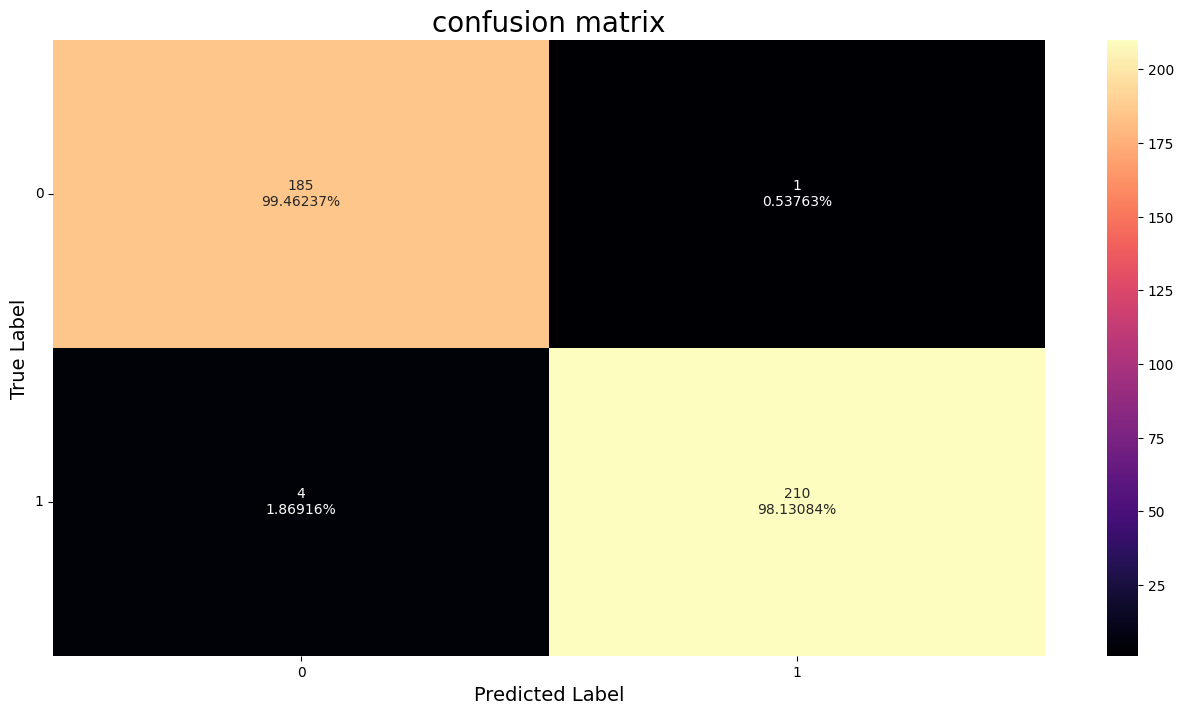

In [21]:
plot_confusion_matrix(matrix, pallete=plt.cm.magma)

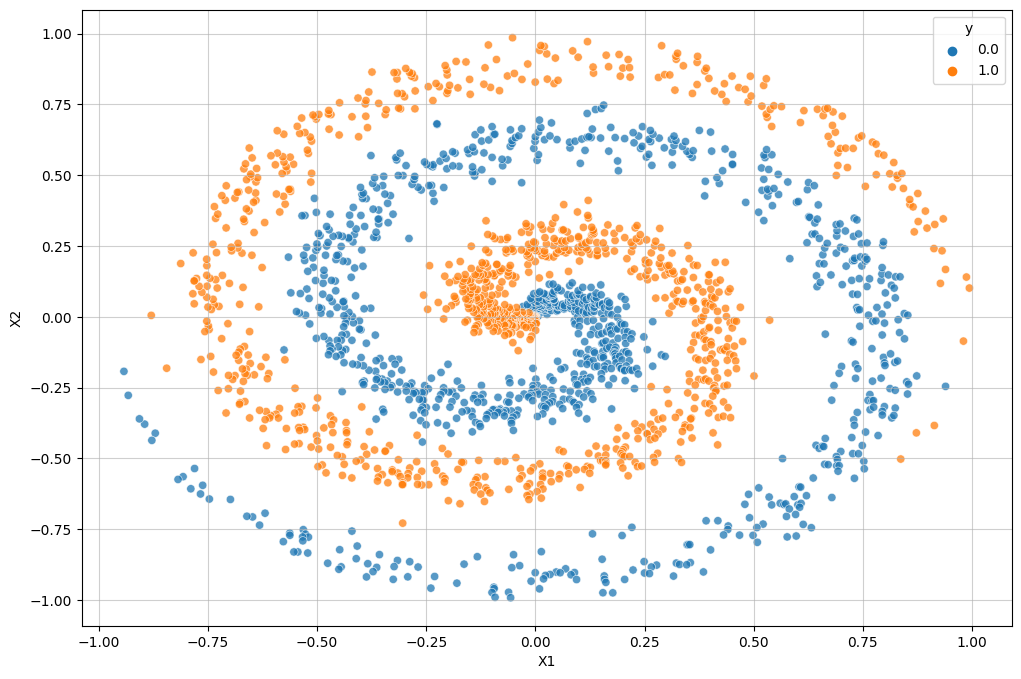

In [10]:
df = pd.DataFrame(np.append(X, y.reshape(-1,1), axis=1), columns=['X1', 'X2', 'y'])

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='X1', y='X2', hue='y', alpha=.75)
plt.grid(alpha=.6)
plt.show()

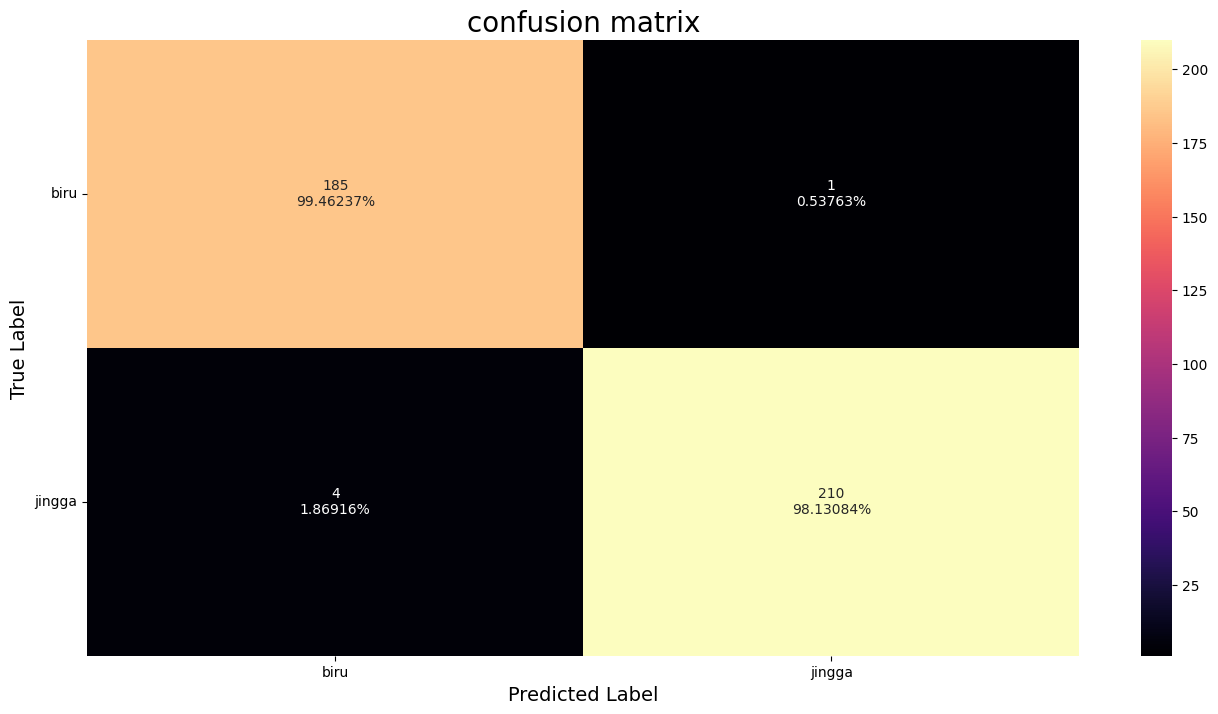

In [22]:
# Jika menggunakan label
labels = {
    0: 'biru',
    1: 'jingga'
}

plot_confusion_matrix(matrix, pallete=plt.cm.magma, class_labels=labels)

variable  value
y pred    0.0      189
          1.0      211
y test    0.0      186
          1.0      214
dtype: int64

<AxesSubplot:xlabel='value'>

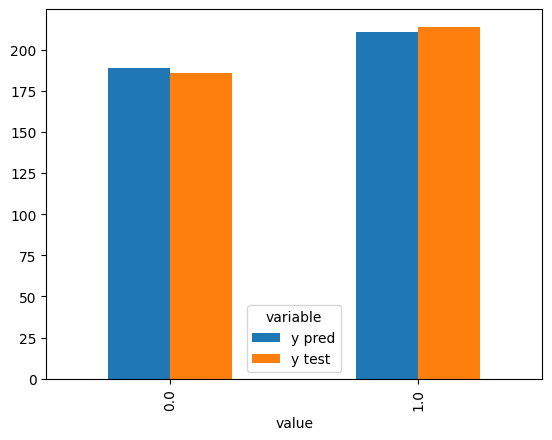

In [12]:
df_compare = pd.DataFrame(np.append(y_test.reshape(-1,1), y_pred.reshape(-1,1), axis=1), columns=['y test', 'y pred'])

grouping = df_compare.melt().value_counts().sort_index()
display(grouping)
grouping.unstack('variable').plot.bar()